# Observability starter workflow for Langchain LLMChain-based solutions

This accelerator shows how you can easily enable observability in your <a href='https://docs.langchain.com/docs/components/chains/llm-chain'>LLMChain</a>-based AI Solutions with DataRobot's LLMOps feature tools. It outlines an example of a byte-sized solution in its current state and then uses DataRobot tools to enable observability almost instantly for the solution.

DataRobot provides tools to enable the observability of external generative models. All the hallmarks of DataRobot MLOps are now available for LLMOps.

## Setup

### Install the prerequisite libraries

This notebook uses <a href='https://docs.langchain.com/docs/'>Langchain's</a> LLMChain to illustrate a simple generative AI solution. Langchain is a framework for developing applications powered by language models easily. It simplifies application development by providing a simple and comprehensive API for a wide variety of Large Language Modeling inference tasks. Langchain's <a href='https://docs.langchain.com/docs/components/chains/chain'>Chain</a> is an end-to-end wrapper around multiple individual components.

In [1]:
!pip install datarobotx[llm] datarobot-mlops datarobot-mlops-connected-client "langchain==0.0.335" transformers  nltk py-readability-metrics

### Current state 

The following cells outline the current state of a simple function utilizing the Azure-hosted GPT LLM. This accelerator uses the `LLMChain` object from the Langchain library to build a text generation example. An <a href='https://docs.langchain.com/docs/components/chains/llm-chain'>LLMChain</a> is the type of chain intended for use in LLM inference. It takes multiple input variables, uses the PromptTemplate to format them into a prompt. It then passes that to the model. Finally, it uses the OutputParser (if provided) to parse the output of the LLM into a final format.
<br>
<br>

In [ ]:
import os
import warnings

import datarobot as dr
from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.chat_models import AzureChatOpenAI

warnings.filterwarnings("ignore")

prompt = PromptTemplate(
    input_variables=["concept"],
    template="Explain the {concept} provided in the conversation to me like I am 5 year old.",
)

chain = LLMChain(
    llm=AzureChatOpenAI(
        deployment_name=os.environ["OPENAI_DEPLOYMENT_NAME"],
        openai_api_type=os.environ["OPENAI_API_TYPE"],
        openai_api_base=os.environ["OPENAI_API_BASE"],
        openai_api_version=os.environ["OPENAI_API_VERSION"],
        openai_api_key=os.environ["OPENAI_API_KEY"],
        openai_organization=os.environ["OPENAI_ORGANIZATION"],
        model_name=os.environ["OPENAI_DEPLOYMENT_NAME"],
        temperature=0,
        verbose=True,
    ),
    prompt=prompt,
)

chain.run(concept="Agile")

'Agile is like playing with building blocks. Instead of building one big tower all at once, we build smaller towers step by step. We can change our plans as we go and make improvements along the way. It helps us work together and finish our tower faster.'

## Observability with DataRobot

To enable observability on the above LLMChain object, you first need to create a deployment in DataRobot. This can be done from the GUI or the API based on your preference. <br>
If the chain object is used as is in your application for inference, DataRobot's extended library <a href='https://drx.datarobot.com/index.html'>DRX</a> provides users the functionality to monitor the LLMChain object without the need for code rewrites such as wrapping the chain inside a new function.  

### Connect to DataRobot

In [ ]:
# Initialize the DataRobot Client if you are not running this code on the DataRobot platform.
# import datarobot as dr
# dr.Client(endpoint=ENDPOINT,token=TOKEN)

In [ ]:
from utilities import create_external_llm_deployment

deployment_id, model_id = create_external_llm_deployment("Deployment Guarded Chain")
deployment_id

[nltk_data] Downloading package punkt to /home/notebooks/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'6512ef9195d7566749fddd81'

### Initiate monitoring configuration

The cells below declare and initialize monitoring configuration. The <a href='https://drx.datarobot.com/reference/_autosummary/datarobotx.llm.MonitoringConfig.html#datarobotx.llm.MonitoringConfig'>MonitoringConfig</a> object lets DataRobot capture the input and output of the LLMChain object and record the values on the above deployments. The <a href='https://drx.datarobot.com/reference/_autosummary/datarobotx.llm.GuardChain.html#datarobotx.llm.GuardChain'>GuardChain</a> object expects the LLMChain to be monitored and the MonitoringConfig objects as inputs.

With just a few lines of code shown below, you can enable observability in your LLMChain-based solutions. 

In [ ]:
import json

from datarobotx.llm.chains.guard import GuardChain, MonitoringConfig

monitor_config1 = MonitoringConfig(deployment_id=deployment_id, model_id=model_id, target="text")

chain = GuardChain(inner_chain=chain, monitor=monitor_config1)
chain

GuardChain(memory=None, callbacks=None, callback_manager=None, verbose=False, tags=None, metadata=None, inner_chain=LLMChain(memory=None, callbacks=None, callback_manager=None, verbose=False, tags=None, metadata=None, prompt=PromptTemplate(input_variables=['concept'], output_parser=None, partial_variables={}, template='Explain the {concept} provided in the conversation to me like I am 5 year old.', template_format='f-string', validate_template=True), llm=AzureChatOpenAI(cache=None, verbose=True, callbacks=None, callback_manager=None, tags=None, metadata=None, client=<class 'openai.api_resources.chat_completion.ChatCompletion'>, model_name='gpt-35-turbo-16k', temperature=0.0, model_kwargs={}, openai_api_key='5d88cbce4ba84373816840e3abc1d898', openai_api_base='https://datarobot-openai-prototyping.openai.azure.com/', openai_organization='datarobot-openai-prototyping', openai_proxy='', request_timeout=None, max_retries=6, streaming=False, n=1, max_tokens=None, tiktoken_model_name=None, dep

In [ ]:
chain.run(concept="agile")

'Agile is like playing with building blocks. Instead of building one big tower all at once, we build smaller towers step by step. We can change our plans as we go and make improvements along the way. It helps us work together and finish our project faster.'

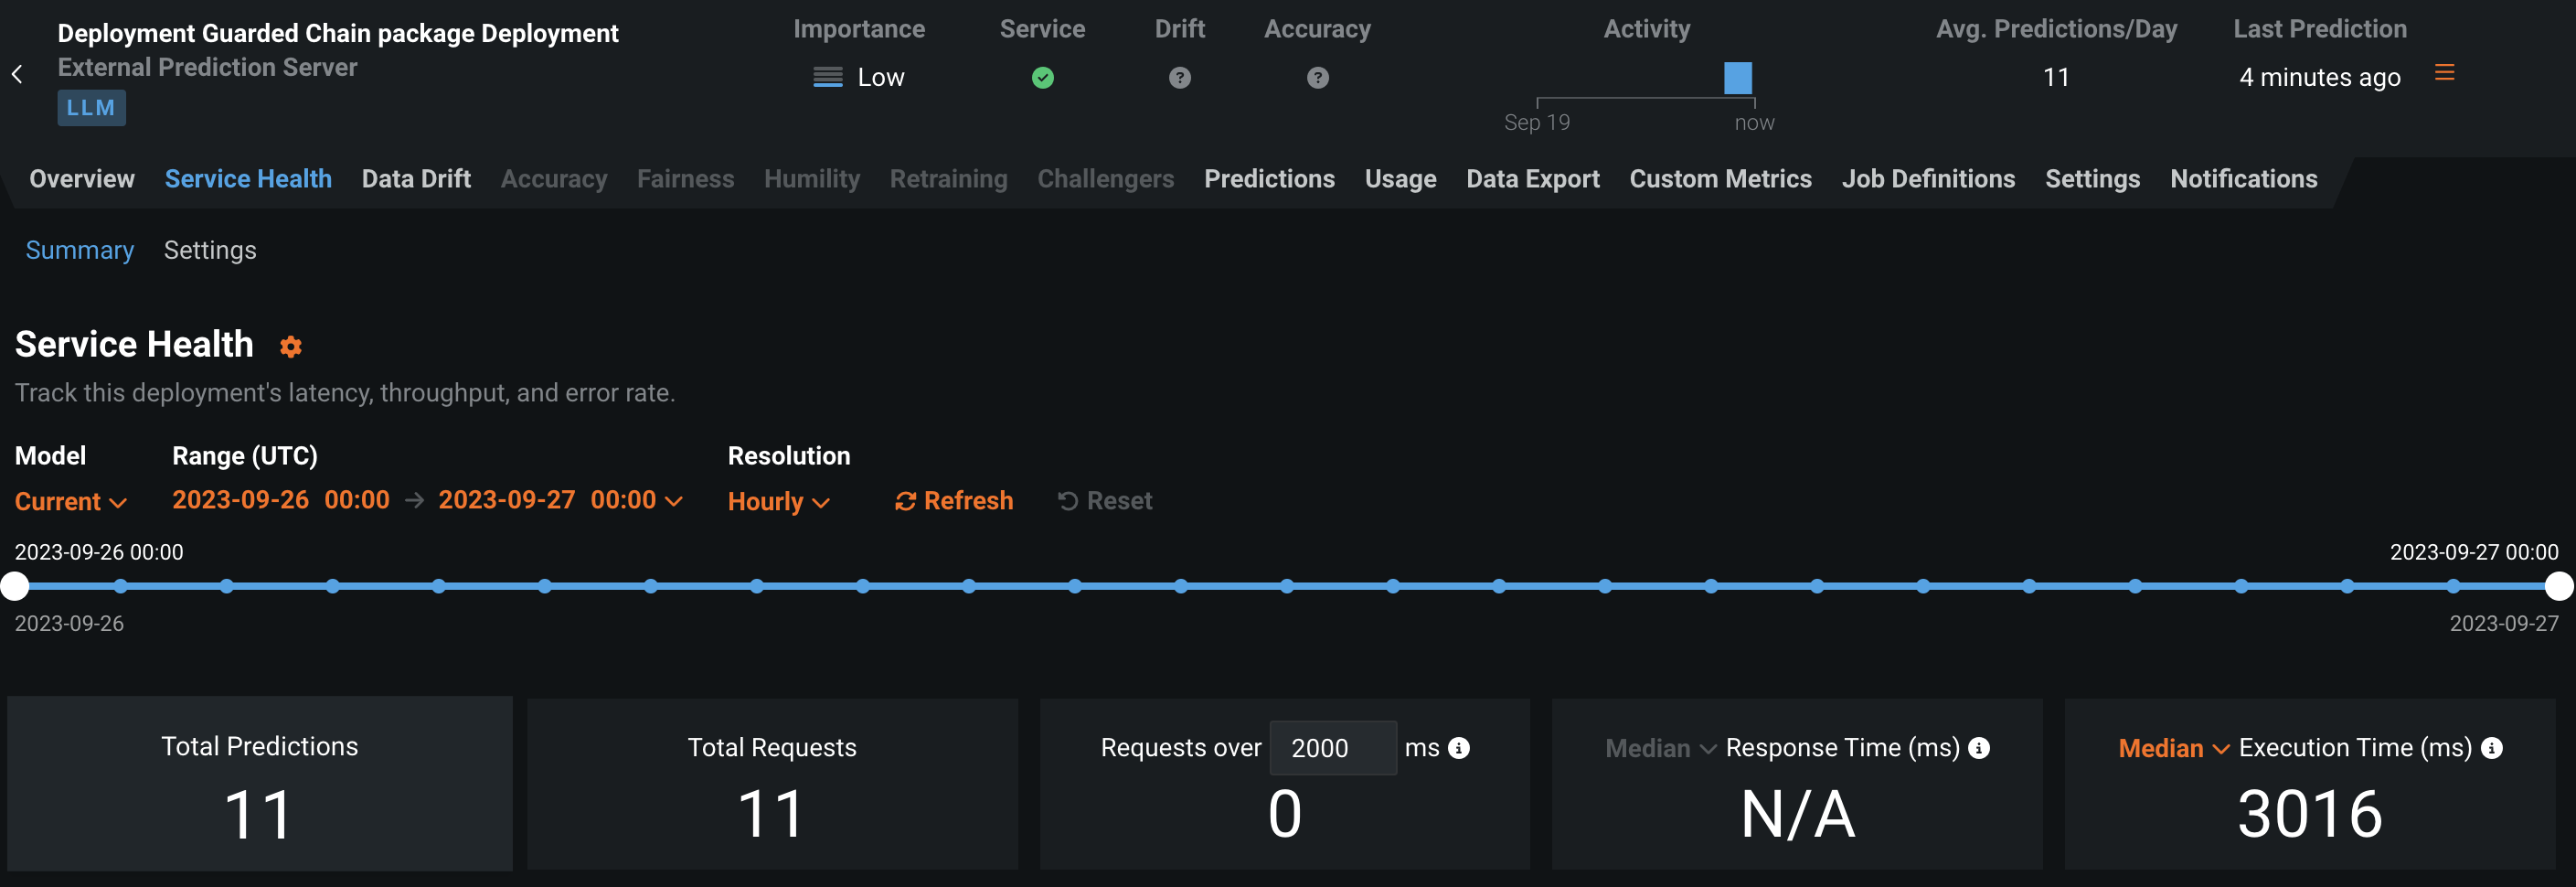

## Conclusion

Using DataRobot's tools for LLMOps, you can implement observability for your LLMChain based applications easily without the need for significant code rewrites.